In [155]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
data= pd.read_csv(r"./dataset/Mall_Customers.csv") # 고객 데이터셋 불러오기
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [188]:
x = data.iloc[:, [3, 4]].values
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [207]:
def euclidean_distance(pt1, pt2):
    distance = 0
    for i in range(2):
        distance += (pt1[i] - pt2[i]) ** 2
    return distance ** 0.5

In [208]:
def add_cluster(m, point_id, eps):
    cluster = []
    for i in range(0, len(x)):
        if euclidean_distance(m[point_id],m[i]) < eps:
            cluster.append(i)
    return cluster

In [235]:
def expand_cluster(m, classifications, index, cluster_id, eps, min_points):
    cluster = add_cluster(m, index, eps)
    if len(cluster) < min_points:
        classifications[index] = -1
        return False
    else:
        classifications[index] = cluster_id
        for i in cluster:
            classifications[i] = cluster_id
            
        while len(cluster) > 0:
            current_point = cluster[0]
            results = add_cluster(m, current_point, eps)
            if len(results) >= min_points:
                for i in range(0, len(results)):
                    result_point = results[i]
                    if classifications[result_point] == 0:
                        cluster.append(result_point)
                    classifications[result_point] = cluster_id
            cluster = cluster[1:]
        return True

In [236]:
def dbscan(m, eps, min_points):
    cluster_id = 1
    n_points = m.shape[0]
    classifications = [0] * n_points
    for i in range(0, n_points):
        if classifications[i] == 0:
            if expand_cluster(m, classifications, i, cluster_id, eps, min_points):
                cluster_id = cluster_id + 1
    return classifications

In [237]:
labels = dbscan(x,12,10)
labels = np.array(labels)
labels

array([-1,  1,  2,  1, -1,  1,  2, -1,  2,  1,  2, -1,  2,  1,  2,  1, -1,
        1, -1, -1, -1,  1,  2,  1,  2,  1,  3,  3,  3,  1,  2,  1,  2,  1,
       -1,  1, -1,  3,  3,  3,  3, -1,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  4,  3,  4,  3,  4,  5,  4,  5,  4,  3,  4,  5,  4,
        5,  4,  5,  4,  5,  4,  3,  4,  5,  4,  3,  4,  5,  4,  5,  4,  5,
        4,  5,  4,  5,  4,  5,  4,  3,  4,  5,  4,  5,  4,  5,  4,  5, -1,
        5,  4,  5,  4,  5,  4,  5,  4,  5,  4, -1,  4,  5,  4, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

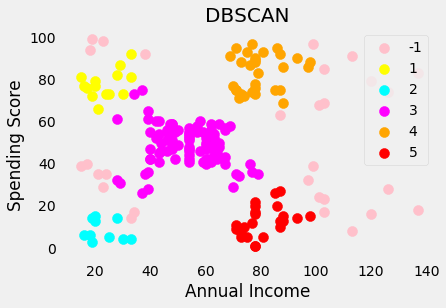

In [238]:
plt.scatter(x[labels == -1, 0], x[labels == -1, 1], s = 100, c = 'pink', label = '-1')
plt.scatter(x[labels == 1, 0], x[labels == 1, 1], s = 100, c = 'yellow', label = '1')
plt.scatter(x[labels == 2, 0], x[labels == 2, 1], s = 100, c = 'cyan', label = '2')
plt.scatter(x[labels == 3, 0], x[labels == 3, 1], s = 100, c = 'magenta', label = '3')
plt.scatter(x[labels == 4, 0], x[labels == 4, 1], s = 100, c = 'orange', label = '4')
plt.scatter(x[labels == 5, 0], x[labels == 5, 1], s = 100, c = 'red', label = '5')

plt.style.use('fivethirtyeight')
plt.title('DBSCAN', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()